In [120]:
import torch
from torch import nn
from torchvision import transforms
import PIL

transform = transforms.Compose([
    # transforms.Grayscale()
    transforms.ToTensor()
])

In [121]:
X = PIL.Image.open("/Users/sunweixiang/Desktop/DeepLearing-with-pytorch/[8] CNN/lenna_img.jpg")
X_tensor = transform(X)
X_tensor.shape

torch.Size([3, 200, 200])

In [122]:
def fuzz(X):
    K = torch.zeros(3,3)
    K = torch.fill_(K, 1/9)
    Y = torch.zeros(3, X.shape[1]-2, X.shape[2]-2)
    for i in range(3):
        for j in range(X.shape[1]-2):
            for k in range(X.shape[2]-2):
                Y[i][j][k] = (X[i][j: j+3, k: k+3] * K).sum()
    return Y


In [123]:
# X_tensor = fuzz(X_tensor)
# new_img = transforms.ToPILImage()(X_tensor)
# new_img

In [124]:
def fuzz(X):
    K = torch.zeros(3,3)
    K = torch.fill_(K, 1/9)
    Y = torch.zeros(3, X.shape[1]-2, X.shape[2]-2)
    K.to(torch.device('mps'))
    X.to(torch.device('mps'))
    Y.to(torch.device('mps'))
    for i in range(3):
        for j in range(X.shape[1]-2):
            for k in range(X.shape[2]-2):
                Y[i][j][k] = (X[i][j: j+3, k: k+3] * K).sum()
    return Y

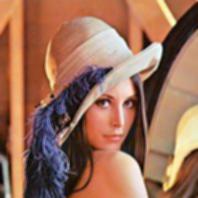

In [125]:
X_tensor = fuzz(X_tensor)
new_img = transforms.ToPILImage()(X_tensor)
new_img